# Extension Three Notebook:

The baseline does not involve significant sensor noise; thus, the next extension investigates the impact of sensor uncertainty on the AV. Run the cells below to run the experiment. 

In [1]:
# Automatically reload custom code modules when there are changes:
%load_ext autoreload
%autoreload 2

In [2]:
# Adjust relative path so that the notebook can find the code modules:
import sys
sys.path.append('../code/')

In [3]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [4]:
# Import code modules:
from structures import RingRoad
from animations import Animation
from extension_three import extension_three

In [5]:
# Hide warnings about safe distance violation (still in development):
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

Running 40 simulations
On simulation #20
On simulation #40


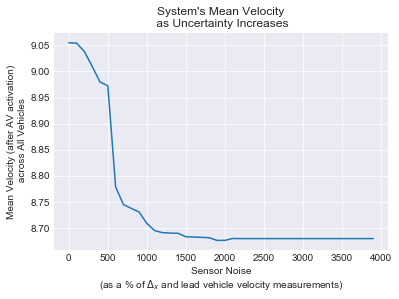

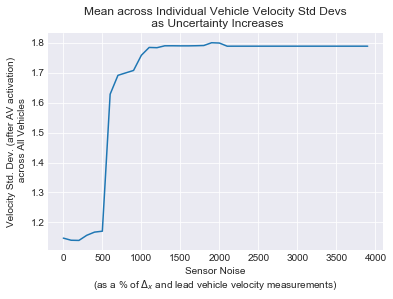

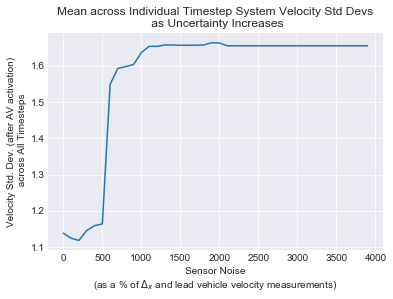

In [6]:
extension_three(max_sigma_pct=4000, granularity=100, show_fig=True)

Now we build the noisiest case to investigate behavior:

In [7]:
# Build noisiest env to investigate behavior
env = RingRoad(
    num_vehicles = 22,  # The vechicles at index 0 is an A.V.
    ring_length = 230.0,  # The road is a cicle.
    starting_noise = 4.0,  # Uniformly add noise to starting positions.
    temporal_res = 0.3,  # Set the size of simulation steps (seconds).
    av_activate = 30,  # Set when the PID controller is activated.
    seed = 286,  # Set a random seed.
    uncertain_avs=True,
    sigma_pct=40
)

# Run simulation for set number of time steps:
total_time = 50  # In seconds.
total_steps = int(np.ceil(total_time / env.dt))
env.run(steps=total_steps)

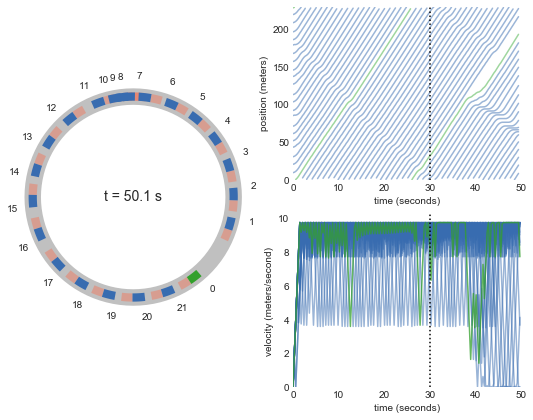

In [8]:
# Show simulation dashboard:
step = env.step
fig, axs = env.plot_dashboard(
    step=step, total_steps=total_steps,
    draw_cars_to_scale=True, draw_safety_buffer=True, label_step=True, label_cars=True,
)

In the above we can clearly see the detrimental effect of the noise: the AV brakes severely and without reason around 40 seconds! The below code builds and saves the .gif -- see the "outputs" folder to watch it.  

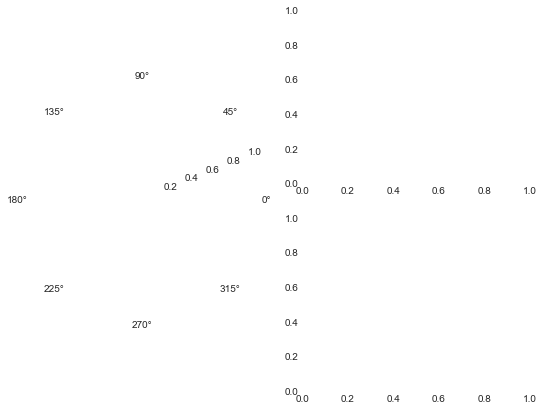

In [9]:
# Build animation:
anim = Animation(env, speedup=5.0, interval=5)
anim.animate_dashboard(draw_cars_to_scale=True, draw_safety_buffer=False, show_sigma=True)

# Show animation:
# anim.show()

In [10]:
# Save animation as GIF (may take a few minutes -- pauses preview above):
anim.save_gif(filepath="../outputs/ext3-noisy.gif", overwrite=True)

Saved : ../outputs/ext3-noisy.gif .


For comparison, we can build a case with less noise and visualize what is happening. As was the case above, this save the .gif in the "outputs" folder.

In [13]:
# Build noisiest env to investigate behavior
env = RingRoad(
    num_vehicles = 22,  # The vechicles at index 0 is an A.V.
    ring_length = 230.0,  # The road is a cicle.
    starting_noise = 4.0,  # Uniformly add noise to starting positions.
    temporal_res = 0.3,  # Set the size of simulation steps (seconds).
    av_activate = 30,  # Set when the PID controller is activated.
    seed = 286,  # Set a random seed.
    uncertain_avs=True,
    sigma_pct=3.5
)

# Run simulation for set number of time steps:
total_time = 50  # In seconds.
total_steps = int(np.ceil(total_time / env.dt))
env.run(steps=total_steps)

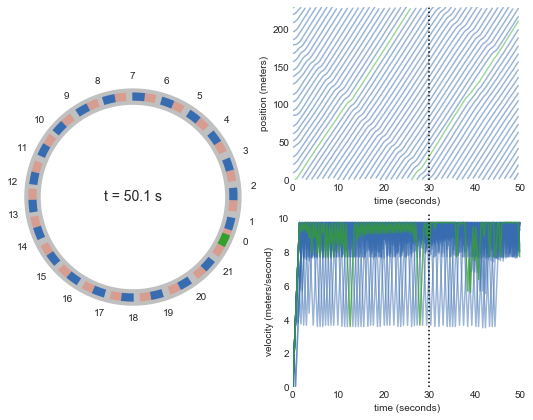

In [14]:
# Show step of simulation:
step = env.step
fig, axs = env.plot_dashboard(
    step=step, total_steps=total_steps,
    draw_cars_to_scale=True, draw_safety_buffer=True, label_step=True, label_cars=True,
)

Thus we can see that despite the noise the AV succeeds in reducing some of the oscillations, but not to the same extent as occurred in the baseline (where noise was not present). 

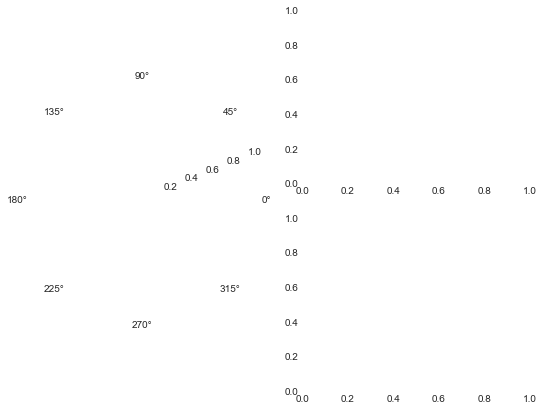

In [15]:
# Build animation:
anim = Animation(env, speedup=5.0, interval=5)
anim.animate_dashboard(draw_cars_to_scale=True, draw_safety_buffer=False, show_sigma=True)

# Show animation:
# anim.show()

In [16]:
# Save animation as GIF (may take a few minutes -- pauses preview above):
anim.save_gif(filepath="../outputs/ext3-quiet.gif", overwrite=True)

Saved : ../outputs/ext3-quiet.gif .
